## Import libraries

In [1]:
#https://www.youtube.com/watch?v=e8Yw4alG16Q
import numpy as np
import pandas as pd 
from datetime import datetime
import matplotlib.pylab as plt
#matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

## Data preparation

In [2]:
dataset = pd.read_csv('AirPassengers.csv')
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
dataset['Month']=pd.to_datetime(dataset['Month'],infer_datetime_format=True)
indexed_dataset=dataset.set_index(['Month'])

In [4]:
indexed_dataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
indexed_dataset.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


/Users/FY/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


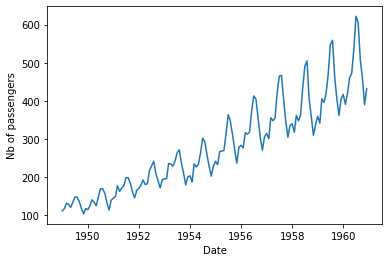

In [6]:
## plot graph 
plt.xlabel('Date')
plt.ylabel('Nb of passengers')
plt.plot(indexed_dataset)

## Stationary?

In [7]:
# Determining rolling statistics
roll_mean = indexed_dataset.rolling(window=12).mean()
roll_std = indexed_dataset.rolling(window=12).std()
roll_mean,roll_std  #first 12-1=11 items are NaN

(            #Passengers
 Month                  
 1949-01-01          NaN
 1949-02-01          NaN
 1949-03-01          NaN
 1949-04-01          NaN
 1949-05-01          NaN
 ...                 ...
 1960-08-01   463.333333
 1960-09-01   467.083333
 1960-10-01   471.583333
 1960-11-01   473.916667
 1960-12-01   476.166667
 
 [144 rows x 1 columns],             #Passengers
 Month                  
 1949-01-01          NaN
 1949-02-01          NaN
 1949-03-01          NaN
 1949-04-01          NaN
 1949-05-01          NaN
 ...                 ...
 1960-08-01    83.630500
 1960-09-01    84.617276
 1960-10-01    82.541954
 1960-11-01    79.502382
 1960-12-01    77.737125
 
 [144 rows x 1 columns])

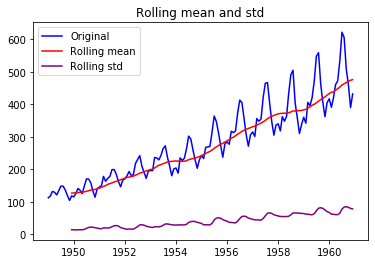

In [8]:
# plot rolling statics
original = plt.plot(indexed_dataset,color='blue',label='Original')
mean = plt.plot(roll_mean,color='red',label='Rolling mean')
std = plt.plot(roll_std,color='purple',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and std')
plt.show(block=False)

In [9]:
# Duckey-Fuller test: 进行单位根检验
from statsmodels.tsa.stattools import adfuller
print('Results of Duckey-Fuller test')
dftest = adfuller(indexed_dataset['#Passengers'],autolag='AIC') #
dfoutput = pd.Series(dftest[0:4], index=['Test statistic','p-value','#Lags Used','Number of Observation Used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]=value
print(dfoutput)
# p-value is very high, =0.99, it should be around 0.5, so the dataset is not stationary

Results of Duckey-Fuller test
Test statistic                  0.815369
p-value                         0.991880
#Lags Used                     13.000000
Number of Observation Used    130.000000
Critical value (1%)            -3.481682
Critical value (5%)            -2.884042
Critical value (10%)           -2.578770
dtype: float64


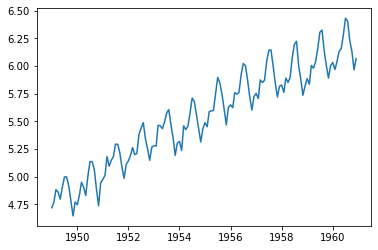

In [10]:
# Estimating trend
indexed_dataset_log = np.log(indexed_dataset)
plt.plot(indexed_dataset_log)

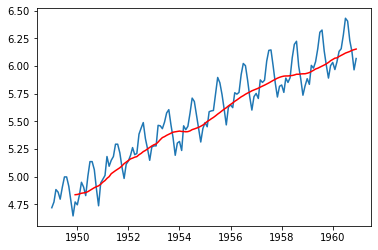

In [11]:
moving_average = indexed_dataset_log.rolling(window=12).mean()
moving_std = indexed_dataset_log.rolling(window=12).std()
plt.plot(indexed_dataset_log)
plt.plot(moving_average,color='red')

In [12]:
difference = indexed_dataset_log - moving_average
difference.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [13]:
# remove NaN
difference.dropna(inplace=True)
difference.head(12)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [14]:
# redo all the steps
from statsmodels.tsa.stattools import adfuller

def test_stationary(timeSeries):
    
    moving_average = timeSeries.rolling(window=12).mean()
    moving_std = timeSeries.rolling(window=12).std()
    
    original = plt.plot(timeSeries,color='blue',label='Original')
    mean = plt.plot(moving_average,color='red',label='Rolling mean')
    std = plt.plot(moving_std,color='purple',label='Rolling std')
    
    plt.legend(loc='best')
    plt.title('Rolling mean and std')
    plt.show(block=False)
    
    print('Results of Duckey-Fuller test')
    dftest = adfuller(timeSeries['#Passengers'],autolag='AIC') #
    dfoutput = pd.Series(dftest[0:4], index=['Test statistic','p-value','#Lags Used','Number of Observation Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key]=value
    print(dfoutput)

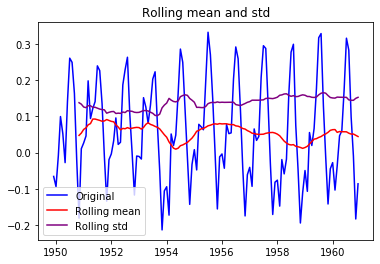

Results of Duckey-Fuller test
Test statistic                 -3.162908
p-value                         0.022235
#Lags Used                     13.000000
Number of Observation Used    119.000000
Critical value (1%)            -3.486535
Critical value (5%)            -2.886151
Critical value (10%)           -2.579896
dtype: float64


In [15]:
test_stationary(difference)  #now is stationary

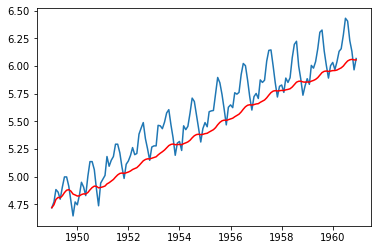

In [16]:
exponetialDecayWeightedAverage=indexed_dataset_log.ewm(halflife=12,min_periods=0,adjust=True).mean() #指数加权函数
plt.plot(indexed_dataset_log)
plt.plot(exponetialDecayWeightedAverage,color='red')

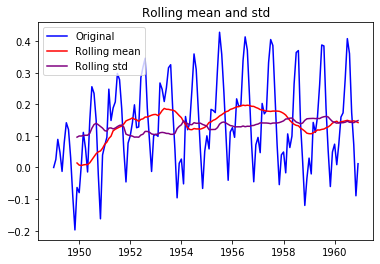

Results of Duckey-Fuller test
Test statistic                 -3.601262
p-value                         0.005737
#Lags Used                     13.000000
Number of Observation Used    130.000000
Critical value (1%)            -3.481682
Critical value (5%)            -2.884042
Critical value (10%)           -2.578770
dtype: float64


In [17]:
difference2 = indexed_dataset_log - exponetialDecayWeightedAverage
test_stationary(difference2)

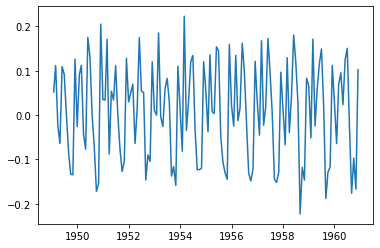

In [20]:
dataLogDiffShift = indexed_dataset_log - indexed_dataset_log.shift() # shift the values by 1 
plt.plot(dataLogDiffShift)

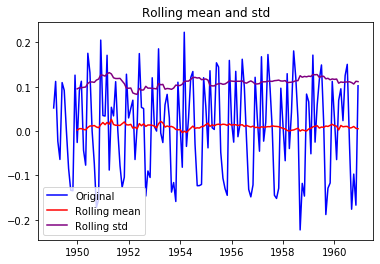

Results of Duckey-Fuller test
Test statistic                 -2.717131
p-value                         0.071121
#Lags Used                     14.000000
Number of Observation Used    128.000000
Critical value (1%)            -3.482501
Critical value (5%)            -2.884398
Critical value (10%)           -2.578960
dtype: float64


In [21]:
dataLogDiffShift.dropna(inplace=True)
test_stationary(dataLogDiffShift)   #stationary 

## Seasonal?

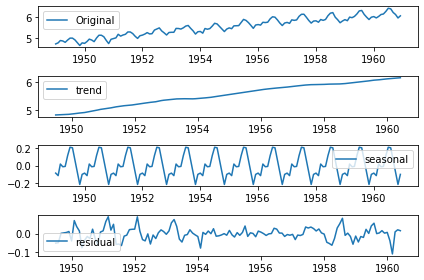

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexed_dataset_log)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.subplot(411)
plt.plot(indexed_dataset_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')
plt.tight_layout()

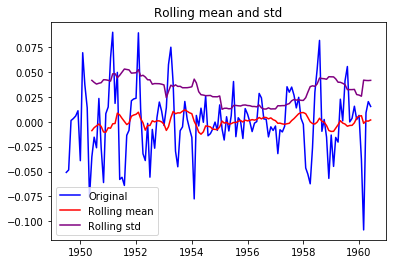

Results of Duckey-Fuller test
Test statistic               -6.332387e+00
p-value                       2.885059e-08
#Lags Used                    9.000000e+00
Number of Observation Used    1.220000e+02
Critical value (1%)          -3.485122e+00
Critical value (5%)          -2.885538e+00
Critical value (10%)         -2.579569e+00
dtype: float64


In [25]:
decomposedLogData=residual #irregularities
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData) #not stationary 

## ACF and PACF 

/Users/FY/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


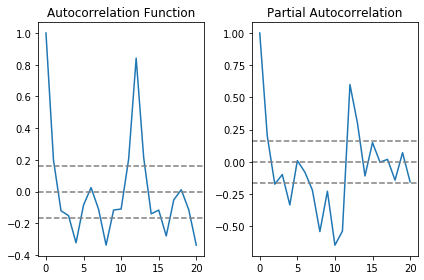

In [28]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf=acf(dataLogDiffShift,nlags=20)
lag_pacf=pacf(dataLogDiffShift,nlags=20,method='ols')

#plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataLogDiffShift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataLogDiffShift)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataLogDiffShift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataLogDiffShift)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation')

plt.tight_layout()


## ARIMA

In [31]:
from statsmodels.tsa.arima_model import ARIMA

/Users/FY/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/FY/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


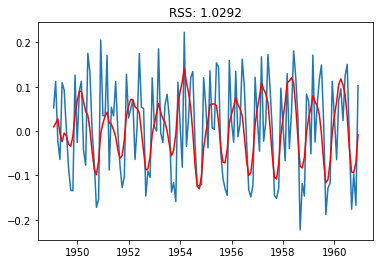

In [32]:
# AR model
model = ARIMA(indexed_dataset_log,order=(2,1,2)) # P=2, D=1, Q=2
results_AR = model.fit(disp=-1)
plt.plot(dataLogDiffShift)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-dataLogDiffShift['#Passengers'])**2))
print('Plotting AR model')
#RSS the smaller the better

/Users/FY/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/FY/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA model


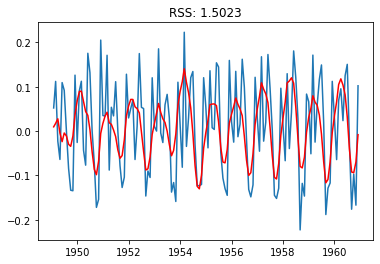

In [33]:
# MA model
model = ARIMA(indexed_dataset_log,order=(0,1,2)) 
results_MA = model.fit(disp=-1)
plt.plot(dataLogDiffShift)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-dataLogDiffShift['#Passengers'])**2))
print('Plotting MA model')

/Users/FY/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/FY/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA model


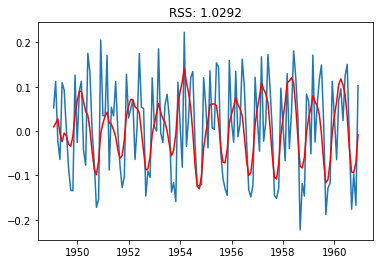

In [37]:
# ARIMA model
model = ARIMA(indexed_dataset_log,order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(dataLogDiffShift)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-dataLogDiffShift['#Passengers'])**2))
print('Plotting ARIMA model')

In [38]:
pred_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(pred_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [39]:
# Convert to cumulative sum
pred_ARIMA_diff_cumsum=pred_ARIMA_diff.cumsum()
pred_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [ ]:
pred_ARIMA_log=pd.Series(indexed_dataset_log['#Passengers'].ix[0],index=indexed_dataset_log.index)
